In [ ]:
from __future__ import division
import numpy as np
import math
import matplotlib.pyplot as plt

**Exemplo 02 - Portadora AM** \\

Queremos mostrar e analisar 5 ciclos completos da onda portadora fc = 0.5, correspondendo a uma duração total de 10 segundos.
A onda portadora é amostrada a uma taxa: \\
1ª - fs = 1Hz (saltos 1 seg) -> 10 × fs = 10 Hz pontos de dados. \\
2ª - fs = 2Hz (saltos 0.5 seg) -> 10 × fs = 20 Hz pontos de dados. \\
3ª - fs = 10Hz (saltos 0.1 seg) -> 10 × fs = 100 Hz pontos de dados.

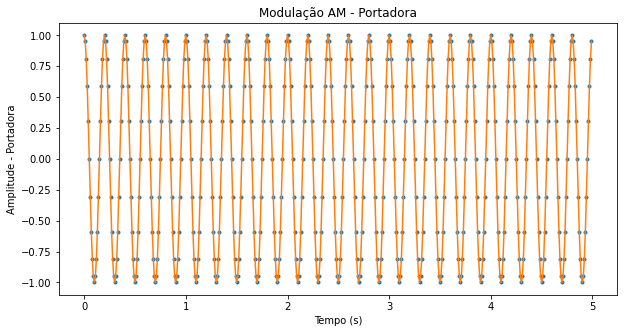

In [ ]:
# Variaveis Inicial ====================================
dt = 0.01 #dx (Passo/Salto) = 1s => (dt = 1/fs), fs é a Taxa de Amostragem do Sinal 
t = np.arange(0,5, dt) #Eixo t - tempo em segundo | intervalo [0-10] | com dt (salto) = 1s 

fc = 5  #frequência da portadora
Ac = 1.0  #amplitude da portadora

# Calculando os valores da Portadora ===================
c = Ac * np.cos(2 * np.pi * fc * t)

# Plot =================================================
fig = plt.figure(figsize=(10,5))

cx = fig.add_subplot(1, 1, 1)
cx.set_title('Modulação AM - Portadora')
cx.set_xlabel('Tempo (s)')
cx.set_ylabel('Amplitude - Portadora')
cx.plot(t, c, ".")
cx.plot(t, c)

plt.show()

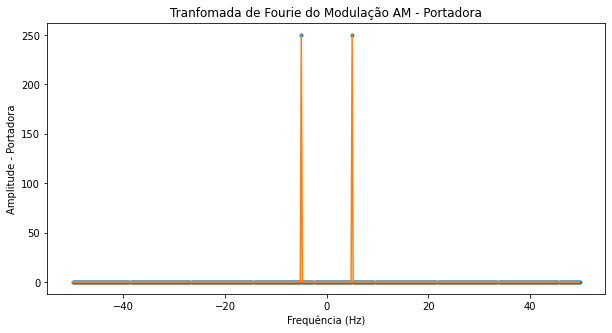

In [ ]:
F = np.fft.fft(c)  
freq = np.fft.fftfreq(np.size(F), d=dt)

# Plot =================================================
fig = plt.figure(figsize=(10,5))

cx = fig.add_subplot(1, 1, 1)
cx.set_title('Tranfomada de Fourie do Modulação AM - Portadora')
cx.set_xlabel('Frequência (Hz)')
cx.set_ylabel('Amplitude - Portadora')
cx.plot(freq, np.abs(F), ".")
cx.plot(freq, np.abs(F))

plt.show()

**Exemplo 03 - Portadora AM** \\

Queremos mostrar e analisar 10 segundos de um sinal portadora, com frequência: \\
1ª - fc = 0.5 (5 ciclos completos da onda) \\
2ª - fc = 1.0 (10 ciclos completos da onda) \\
3ª - fc = 2.0 (20 ciclos completos da onda) \\

A onda portadora é amostrada a uma taxa: \\
1ª - fs = 100Hz (saltos 0.01 seg) -> 10 × fs = 1000 Hz pontos de dados. \\

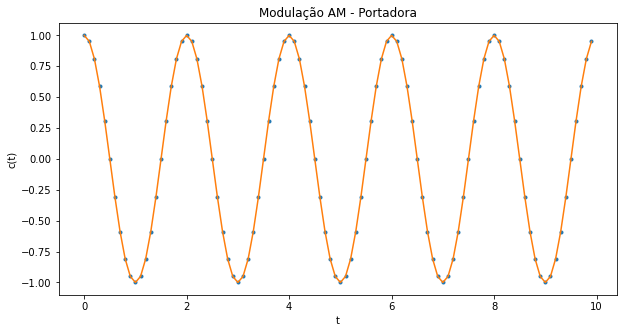

In [ ]:
# Variaveis Inicial ====================================
dt = 0.1 #dx (Passo/Salto) = 1s => (dt = 1/fs), fs é a Taxa de Amostragem do Sinal
t = np.arange(0,10, dt) #Eixo t - tempo em segundo | intervalo [0-10] | com dt (salto) = 1s 

fc = 0.5  #frequência da portadora
Ac = 1  #amplitude da portadora

# Calculando os valores da Portadora ===================
c = Ac * np.cos(2 * np.pi * fc * t)

# Plot =================================================
fig = plt.figure(figsize=(10,5))

cx = fig.add_subplot(1, 1, 1)
cx.set_title('Modulação AM - Portadora')
cx.set_xlabel('t')
cx.set_ylabel('c(t)')
cx.plot(t, c, ".")
cx.plot(t, c)

plt.show()


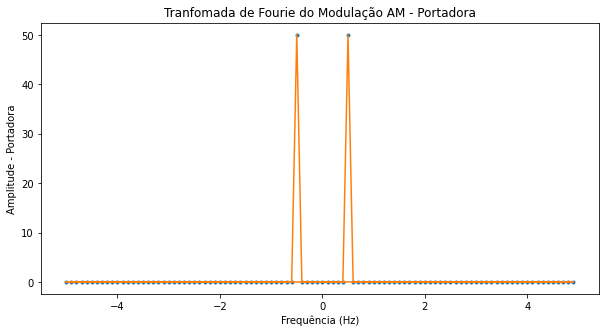

In [ ]:
F = np.fft.fft(c)  
freq = np.fft.fftfreq(np.size(F), d=dt)

# Plot =================================================
fig = plt.figure(figsize=(10,5))

cx = fig.add_subplot(1, 1, 1)
cx.set_title('Tranfomada de Fourie do Modulação AM - Portadora')
cx.set_xlabel('Frequência (Hz)')
cx.set_ylabel('Amplitude - Portadora')
cx.plot(freq, np.abs(F), ".")
cx.plot(freq, np.abs(F))

plt.show()

**Exemplo 04.1 - Onda Modulada AM**

*   Portadora AM (5Hz) 
*   Sinal Mensagem (Tom único - no formato senoidal - 0.1Hz)




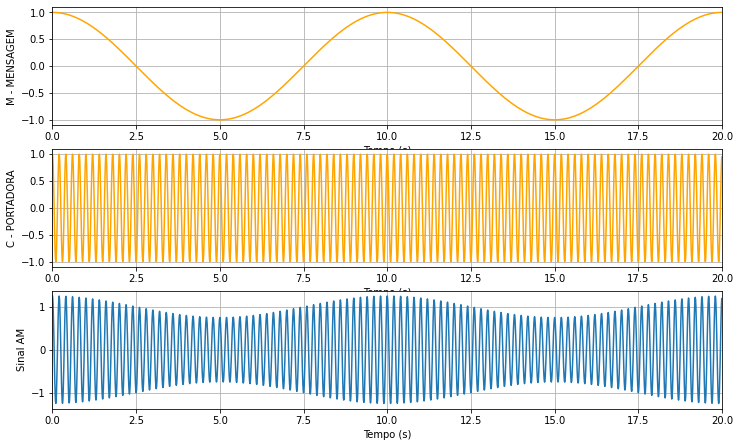

In [ ]:
# Variaveis Inicial ====================================
dt = 0.01 #dx (Passo/Salto) = 1s => (dt = 1/fs), fs é a Taxa de Amostragem do Sinal
t = np.arange(0, 20, dt) #Eixo t - tempo em segundo | intervalo [0-10] | com dt (salto) = 1s 

fc = 5  #frequência da portadora
Ac = 1  #amplitude da portadora

fm = 0.1  #frequência da mensagem
Am = 2    #amplitude da mensagem
Ka = 1/(2*Am) # constante -> "sensibilidade de amplitude do modulador" 
              # responsável pela geração do sinal modulado s(t)

# Calculando a Portadora, a Mensagem e o Sinal Modulado (Usando For) ===================
c = Ac * np.cos(2 * np.pi * fc * t)  #Portadora
m = Ac * np.cos(2 * np.pi * fm * t)  #Mensagem
s = Ac * (1 + Ka*m) * c              #Sinal Modulado

#Plot
plt.figure(figsize=(12, 10))
n_sub = 4

axs_1 = plt.subplot(n_sub, 1, 1)
axs_1.plot( t, m, color='orange')
axs_1.set_xlim(0, 20)
axs_1.set_xlabel('Tempo (s)')
axs_1.set_ylabel('M - MENSAGEM')
axs_1.grid(True)

axs_2 = plt.subplot(n_sub,1,2)
axs_2.plot( t, c, color='orange')
axs_2.set_xlim(0, 20)
axs_2.set_xlabel('Tempo (s)')
axs_2.set_ylabel('C - PORTADORA')
axs_2.grid(True)

axs_3 = plt.subplot(n_sub,1,3)
axs_3.plot(t, s)
axs_3.set_xlim(0, 20)
axs_3.set_xlabel('Tempo (s)')
axs_3.set_ylabel('Sinal AM')
axs_3.grid(True)

fig.tight_layout()

plt.show()

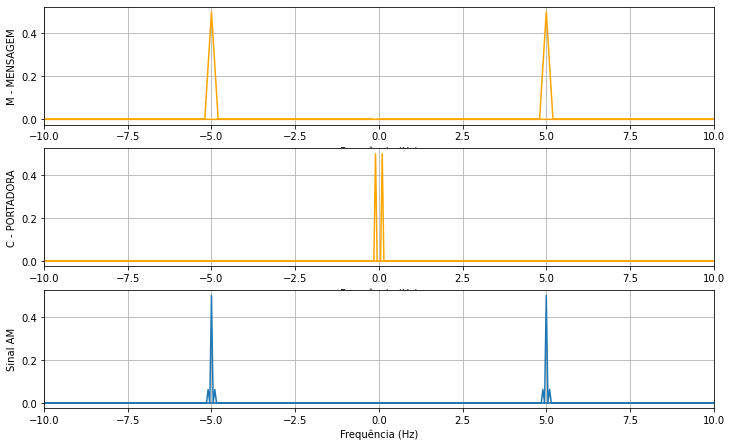

In [ ]:
FM = np.fft.fft(c)  
freq1 = np.fft.fftfreq(np.size(FM), d=dt)
FM_ABS = np.abs(FM/np.size(FM))

FC = np.fft.fft(m)  
freq2 = np.fft.fftfreq(np.size(FC), d=dt)
FC_ABS = np.abs(FC/np.size(FC))

FS = np.fft.fft(s)  
freq3 = np.fft.fftfreq(np.size(FS), d=dt)
FS_ABS = np.abs(FS/np.size(FS))

# Plot =================================================
plt.figure(figsize=(12, 10))
n_sub = 4

axs_1 = plt.subplot(n_sub, 1, 1)
axs_1.plot( freq1, FM_ABS, color='orange')
axs_1.set_xlim(-10, 10)
axs_1.set_xlabel('Frequência (Hz)')
axs_1.set_ylabel('M - MENSAGEM')
axs_1.grid(True)

axs_2 = plt.subplot(n_sub,1,2)
axs_2.plot( freq2, FC_ABS, color='orange')
axs_2.set_xlim(-10, 10)
axs_2.set_xlabel('Frequência (Hz)')
axs_2.set_ylabel('C - PORTADORA')
axs_2.grid(True)

axs_3 = plt.subplot(n_sub,1,3)
axs_3.plot(freq3, FS_ABS)
axs_3.set_xlim(-10, 10)
axs_3.set_xlabel('Frequência (Hz)')
axs_3.set_ylabel('Sinal AM')
axs_3.grid(True)

fig.tight_layout()

plt.show()

**Exemplo 02 - Sinal AM**

*   Portadora AM
*   Sinal Mensagem (Formato de audio - com frequencias maiores que a da porta)

In [ ]:
def controle_freq_mensagem(t, T_m, dt):
  da = T_m
  np.random.seed(19680801)
  m = np.random.randn(len(t))

  if T_m <= dt: 
    da = dt
    print("O periodo para mensagem escolhida é menor que dt!") 
  else:
    for i, x in enumerate(m):
      if t[i]<5 or t[i]>15:    
        m[i] = 0.0
      else:
        if t[i]%da == 0.0:  
          m[i] = m[i]
        else:               
          m[i] = m[i-1]

  return m
  


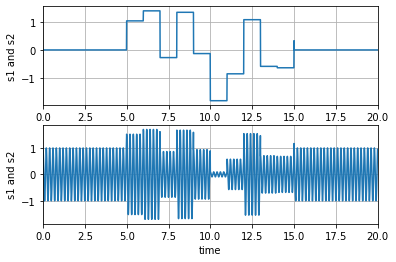

In [ ]:
dt = 0.01 #dx (salto) = 0.1s
t = np.arange(0, 20, dt) #Eixo t - tempo em segundo | intervalo [0-10] | com dt (salto) = 0.1s 

fc = 5
Ac = 1
c = np.cos(2 * np.pi * fc * t)  #Cosseno que define a portadora

m2 = controle_freq_mensagem(t, 1, dt) #mensagem
  
Ka = 1/2
s2 = Ac * (1 + Ka*m2) * c             #Sinal AM

fig, axs = plt.subplots(2, 1)
axs[0].plot(t, m2)
axs[0].set_xlim(0, 20)
axs[0].set_xlabel('time')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

axs[1].plot(t, s2)
axs[1].set_xlim(0, 20)
axs[1].set_xlabel('time')
axs[1].set_ylabel('s1 and s2')
axs[1].grid(True)

plt.show()

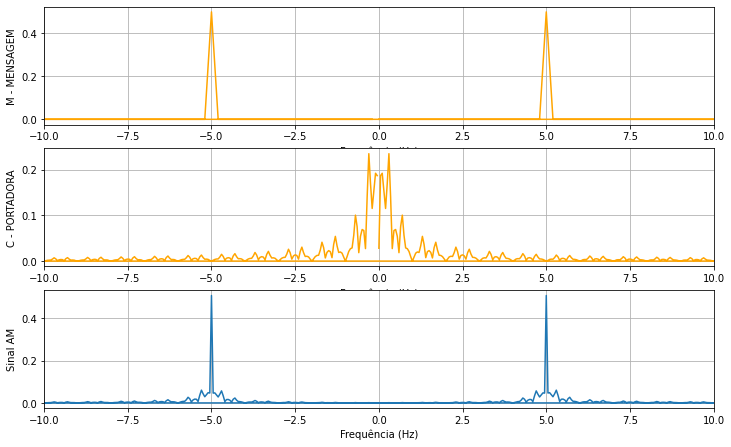

In [ ]:
FM = np.fft.fft(c)  
freq1 = np.fft.fftfreq(np.size(FM), d=dt)
FM_ABS = np.abs(FM/np.size(FM))

FC = np.fft.fft(m2)  
freq2 = np.fft.fftfreq(np.size(FC), d=dt)
FC_ABS = np.abs(FC/np.size(FC))

FS = np.fft.fft(s2)  
freq3 = np.fft.fftfreq(np.size(FS), d=dt)
FS_ABS = np.abs(FS/np.size(FS))

# Plot =================================================
plt.figure(figsize=(12, 10))
n_sub = 4

axs_1 = plt.subplot(n_sub, 1, 1)
axs_1.plot( freq1, FM_ABS, color='orange')
axs_1.set_xlim(-10, 10)
axs_1.set_xlabel('Frequência (Hz)')
axs_1.set_ylabel('M - MENSAGEM')
axs_1.grid(True)

axs_2 = plt.subplot(n_sub,1,2)
axs_2.plot( freq2, FC_ABS, color='orange')
axs_2.set_xlim(-10, 10)
axs_2.set_xlabel('Frequência (Hz)')
axs_2.set_ylabel('C - PORTADORA')
axs_2.grid(True)

axs_3 = plt.subplot(n_sub,1,3)
axs_3.plot(freq3, FS_ABS)
axs_3.set_xlim(-10, 10)
axs_3.set_xlabel('Frequência (Hz)')
axs_3.set_ylabel('Sinal AM')
axs_3.grid(True)

fig.tight_layout()

plt.show()